In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("final.csv")

In [3]:
data.head()

,disbursed_amount_sqrt,ltv_cbrt,Date.of.Birth,Employment.Type,Aadhar_flag,PERFORM_CNS.SCORE.DESCRIPTION,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Age,Amnt_diff,Risk,AVERAGE.ACCT.AGE.MONTHS,CREDIT.HISTORY.LENGTH.MONTHS
0,224.895531,4.473923,1984-01-01,0,1,3,0,0,0,0,...,0,0,0yrs 0mon,0yrs 0mon,0,36,0,0,0,0
1,217.128994,4.183724,1985-07-31,1,1,2,1,27600,50200,50200,...,0,1,1yrs 11mon,1yrs 11mon,0,35,0,1,23,23
2,230.820276,4.475255,1985-08-24,1,1,3,0,0,0,0,...,0,0,0yrs 0mon,0yrs 0mon,0,35,0,0,0,0
3,239.818682,4.456033,1993-12-30,1,1,5,0,0,0,0,...,0,0,0yrs 8mon,1yrs 3mon,1,27,0,1,8,15
4,228.862404,4.454521,1977-09-12,1,1,3,0,0,0,0,...,0,0,0yrs 0mon,0yrs 0mon,1,43,0,1,0,0


In [4]:
data.columns

Index(['disbursed_amount_sqrt', 'ltv_cbrt', 'Date.of.Birth', 'Employment.Type',
       'Aadhar_flag', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'Age', 'Amnt_diff', 'Risk',
       'AVERAGE.ACCT.AGE.MONTHS', 'CREDIT.HISTORY.LENGTH.MONTHS'],
      dtype='object')

In [5]:
data[data['Age']<0]

,disbursed_amount_sqrt,ltv_cbrt,Date.of.Birth,Employment.Type,Aadhar_flag,PERFORM_CNS.SCORE.DESCRIPTION,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,...,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Age,Amnt_diff,Risk,AVERAGE.ACCT.AGE.MONTHS,CREDIT.HISTORY.LENGTH.MONTHS
9,229.353439,4.430199,2068-01-06,0,0,1,0,0,0,0,...,0,0,1yrs 7mon,1yrs 7mon,0,-48,0,0,19,19
26,231.760652,4.478581,2068-02-08,1,1,3,0,0,0,0,...,0,0,0yrs 0mon,0yrs 0mon,0,-48,0,1,0,0
29,233.480192,4.475754,2069-06-27,1,1,1,0,101518,162800,162800,...,1,0,2yrs 0mon,5yrs 4mon,0,-49,0,0,24,64
32,239.288529,4.357511,2066-01-06,0,0,1,0,324323,604845,604845,...,1,0,1yrs 10mon,4yrs 10mon,0,-46,0,0,22,58
40,226.501656,4.277219,2069-01-06,0,1,1,0,8000,145000,145000,...,0,0,1yrs 3mon,2yrs 11mon,0,-49,0,0,15,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229755,271.335586,4.141012,2063-11-15,0,1,3,0,0,0,0,...,0,0,0yrs 0mon,0yrs 0mon,0,-43,0,0,0,0
229760,239.288529,4.293554,2069-06-04,0,1,4,0,489784,500000,500000,...,1,0,0yrs 2mon,0yrs 2mon,2,-49,0,1,2,2
229762,245.859716,4.291564,2064-01-16,0,1,1,0,730581,1731000,1731000,...,1,0,4yrs 1mon,9yrs 5mon,0,-44,0,0,49,113
229775,247.412611,4.103744,2067-01-25,1,1,1,0,1293277,1715911,1685911,...,1,0,1yrs 7mon,3yrs 0mon,0,-47,30000,0,19,36


In [6]:
data1 = data.drop(['Date.of.Birth','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH'],1)

In [7]:
data1.head()

,disbursed_amount_sqrt,ltv_cbrt,Employment.Type,Aadhar_flag,PERFORM_CNS.SCORE.DESCRIPTION,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Age,Amnt_diff,Risk,AVERAGE.ACCT.AGE.MONTHS,CREDIT.HISTORY.LENGTH.MONTHS
0,224.895531,4.473923,0,1,3,0,0,0,0,0,0,0,0,36,0,0,0,0
1,217.128994,4.183724,1,1,2,1,27600,50200,50200,1991,0,1,0,35,0,1,23,23
2,230.820276,4.475255,1,1,3,0,0,0,0,0,0,0,0,35,0,0,0,0
3,239.818682,4.456033,1,1,5,0,0,0,0,31,0,0,1,27,0,1,8,15
4,228.862404,4.454521,1,1,3,0,0,0,0,0,0,0,1,43,0,1,0,0


In [8]:
data1.Age.describe()

count    229786.000000
mean         26.233191
std          24.615651
min         -49.000000
25%          26.000000
50%          32.000000
75%          39.000000
max          50.000000
Name: Age, dtype: float64

In [9]:
ori = pd.read_csv("train.csv")

In [10]:
ori.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [11]:
data1["Date.of.Birth"] = pd.to_datetime(ori['Date.of.Birth'],dayfirst=True)

# Some problem with Age column. Need to deal in further models

In [10]:
data2 =data.drop(['Date.of.Birth','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH','Age'],1)

In [11]:
data2.head()

,disbursed_amount_sqrt,ltv_cbrt,Employment.Type,Aadhar_flag,PERFORM_CNS.SCORE.DESCRIPTION,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Amnt_diff,Risk,AVERAGE.ACCT.AGE.MONTHS,CREDIT.HISTORY.LENGTH.MONTHS
0,224.895531,4.473923,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0
1,217.128994,4.183724,1,1,2,1,27600,50200,50200,1991,0,1,0,0,1,23,23
2,230.820276,4.475255,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0
3,239.818682,4.456033,1,1,5,0,0,0,0,31,0,0,1,0,1,8,15
4,228.862404,4.454521,1,1,3,0,0,0,0,0,0,0,1,0,1,0,0


In [12]:
X = data2.drop('Risk',1)
y = data2['Risk']

In [15]:
print(X.shape)
X.head()

(229786, 16)


,disbursed_amount_sqrt,ltv_cbrt,Employment.Type,Aadhar_flag,PERFORM_CNS.SCORE.DESCRIPTION,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Amnt_diff,AVERAGE.ACCT.AGE.MONTHS,CREDIT.HISTORY.LENGTH.MONTHS
0,224.895531,4.473923,0,1,3,0,0,0,0,0,0,0,0,0,0,0
1,217.128994,4.183724,1,1,2,1,27600,50200,50200,1991,0,1,0,0,23,23
2,230.820276,4.475255,1,1,3,0,0,0,0,0,0,0,0,0,0,0
3,239.818682,4.456033,1,1,5,0,0,0,0,31,0,0,1,0,8,15
4,228.862404,4.454521,1,1,3,0,0,0,0,0,0,0,1,0,0,0


In [16]:
print(y.shape)
y.head()

(229786,)


0    0
1    1
2    0
3    1
4    1
Name: Risk, dtype: int64

# Applying SMOTE to balance the classes in risk

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Confusion Matrix

In [47]:
def cm_df(y_test,preds):
    cm = confusion_matrix(y_test,preds)
    cm = pd.DataFrame(cm, 
                columns = ['Predicted Negative', 'Predicted Positive'],
                index = ['Actual Negative', 'Actual Positive'])
    per_list = []
    per_list.append((cm['Predicted Negative'][0]/(cm['Predicted Negative'][0]+cm['Predicted Negative'][1]))*100)
    per_list.append((cm['Predicted Positive'][1]/(cm['Predicted Positive'][0]+cm['Predicted Positive'][1]))*100)

    cm.insert(2,'Correct percentage',per_list)
    return cm

# Logistic Regression base line

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
clf_lr = LogisticRegression()

In [37]:
clf_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
preds_lr = clf_lr.predict(X_test)

In [52]:
accuracy_lr = f1_score(y_test,preds_lr)
accuracy_lr

0.5461951373539626

In [48]:
cm_df(y_test,preds_lr)

,Predicted Negative,Predicted Positive,Correct percentage
Actual Negative,20749,24236,52.358122
Actual Positive,18880,25947,51.704761


# Decision Tree with default hyper parameters

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
clf_dt = DecisionTreeClassifier()

In [43]:
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
preds_dt = clf_dt.predict(X_test)

In [53]:
accuracy_dt = f1_score(y_test,preds_dt)
accuracy_dt

0.7014362477332651

In [49]:
cm_df(y_test,preds_dt)

,Predicted Negative,Predicted Positive,Correct percentage
Actual Negative,31450,13535,70.276189
Actual Positive,13302,31525,69.962273


# Random Forest with default hyper parameters

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled)

In [20]:
clf_rf = RandomForestClassifier()

In [21]:
clf_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
from sklearn.metrics import f1_score,confusion_matrix

In [23]:
preds = clf_rf.predict(X_test)

In [54]:
accuracy_rf = f1_score(y_test,preds)
accuracy_rf

0.7415485533559799

In [50]:
cm_df(y_test,preds)

,Predicted Negative,Predicted Positive,Correct percentage
Actual Negative,36095,8890,73.261077
Actual Positive,13174,31653,78.072664


In [86]:
#Pickling
random_forest_default = open("random_forest_default.pickle","wb")
pickle.dump(clf_rf, random_forest_default)
random_forest_default.close()

In [87]:
#Load saved model
pickle_in = open("random_forest_default.pickle","rb")
clf_import_rf = pickle.load(pickle_in)

In [88]:
clf_import_rf.predict(vals)

array([0], dtype=int64)

# XGBoost with default parameters

In [28]:
from xgboost import XGBClassifier

In [29]:
clf_xgb = XGBClassifier()

In [30]:
clf_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [31]:
preds_xgb = clf_xgb.predict(X_test)

In [55]:
accuracy_xgb = f1_score(y_test,preds_xgb)
accuracy_xgb

0.7096588008080449

In [51]:
cm_df(y_test,preds_xgb)

,Predicted Negative,Predicted Positive,Correct percentage
Actual Negative,31686,13299,71.132563
Actual Positive,12859,31968,70.620982


Text(0.5, 1.0, 'Model accuracy comparision')

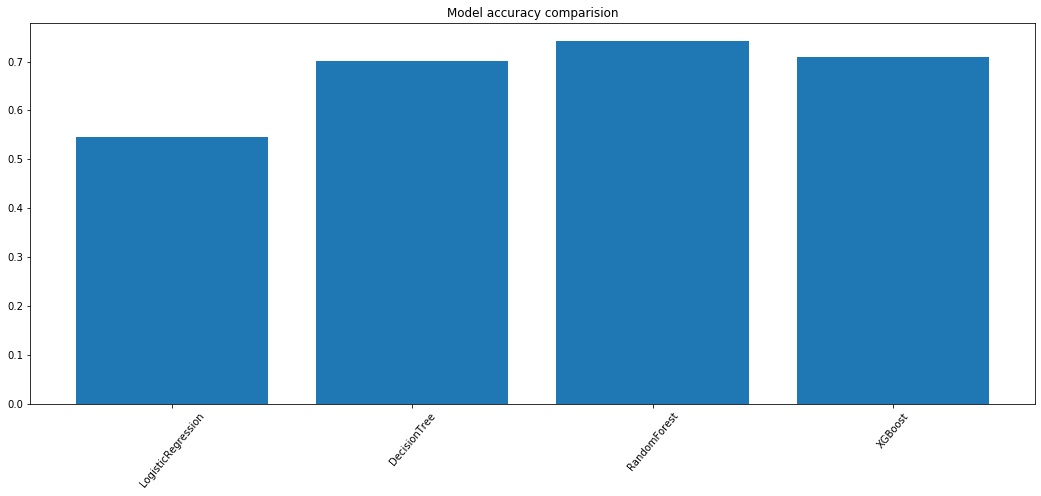

In [84]:
performance = dict(LogisticRegression = accuracy_lr,DecisionTree = accuracy_dt,RandomForest = accuracy_rf,XGBoost = accuracy_xgb)
plt.figure(figsize=(18,7))
plt.bar(range(len(performance)), list(performance.values()), align='center')
plt.xticks(range(len(performance)), list(performance.keys()))
plt.xticks(rotation=50)
plt.title("Model accuracy comparision")

# Finetuning

Apparently, the random forest has better performance over the others. So, let's tune the hyper parameters of Random Forest

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from datetime import datetime

In [62]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [63]:
n_estimators = [100, 300, 500, 800]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

random_grid = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

In [64]:
clf_rf_finetuned = RandomForestClassifier()

In [65]:
#Started at 12.47 PM
folds = 5
param_comb = 15

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(clf_rf_finetuned, param_distributions=random_grid, n_iter=param_comb, scoring='f1', n_jobs=-1, cv=skf.split(X_resampled,y_resampled), verbose=3, random_state=1001 )


start_time = timer(None)
random_search.fit(X_resampled, y_resampled)
timer(start_time)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 63.0min finished



 Time taken: 1 hours 4 minutes and 16.5 seconds.


In [66]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_depth': 30}

In [67]:
#RF with hyper tuned params
rf_finetuned = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
rf_finetuned.fit(X_resampled,y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
preds_rf_tuned = rf_finetuned.predict(X_test)

In [70]:
accuracy_rf_tuned = f1_score(y_test,preds_rf_tuned)
accuracy_rf_tuned

0.8407729812765767

# Saving the model as pickle

In [77]:
random_forest_tuned = open("random_forest_tuned.pickle","wb")
pickle.dump(rf_finetuned, random_forest_tuned)
random_forest_tuned.close()

In [78]:
pickle_in = open("random_forest_tuned.pickle","rb")
clf_import_rf_tuned = pickle.load(pickle_in)

Text(0.5, 1.0, 'Comparision before and after hyper parameter tuning')

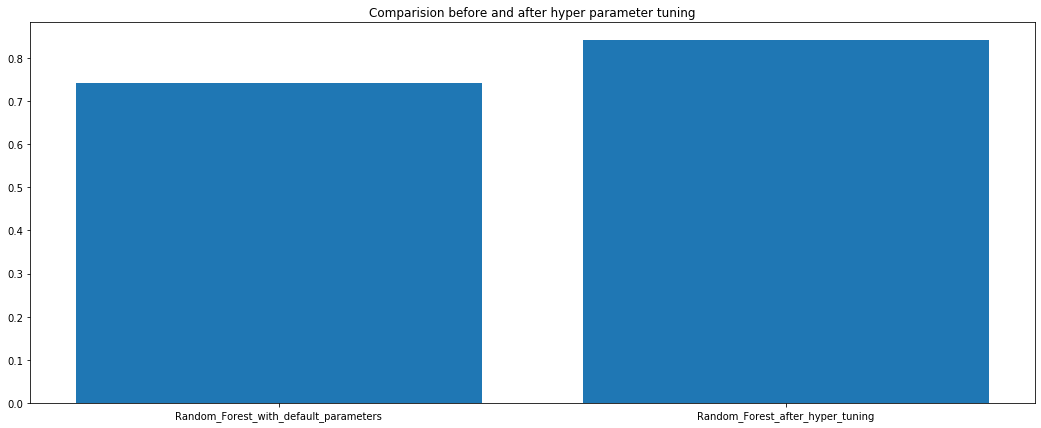

In [85]:
normVShyper = [accuracy_rf,accuracy_rf_tuned]
performance_rf = dict(Random_Forest_with_default_parameters = accuracy_rf,Random_Forest_after_hyper_tuning = accuracy_rf_tuned)
plt.figure(figsize=(18,7))
plt.bar(range(len(performance_rf)), list(performance_rf.values()), align='center')
plt.xticks(range(len(performance_rf)), list(performance_rf.keys()))
plt.title("Comparision before and after hyper parameter tuning")
#plt.xticks(rotation=50)

Accuracy is boosted by 10% !!

In some cases, XGBoost doesn't work well with default parameters but works excellent when we tune it's hyper parameters

So, let's tune XGBoost

In [89]:
xgb_grid = {
        'n_estimators' : [600,700,750,800,850],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 6, 7 , 8, 10],
        'learning_rate' : [0.01 , 0.02, 0.03, 0.05, 0.06, 0.1 ,0.2, 0.4, 0.5]
        }

In [90]:
xgb_tuned = XGBClassifier(objective='binary:logistic', nthread=1)

In [92]:
#Started at 5.37 PM
folds = 5
param_comb = 15

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb_tuned, param_distributions=xgb_grid, n_iter=param_comb, scoring='f1', n_jobs=-1, cv=skf.split(X_resampled,y_resampled), verbose=3, random_state=1001 )


start_time = timer(None) 
random_search.fit(X_resampled, y_resampled)
timer(start_time)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 108.9min finished



 Time taken: 1 hours 55 minutes and 22.28 seconds.


In [95]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5,
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [96]:
xgb_tuned = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5,
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [97]:
xgb_tuned.fit(X_resampled,y_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5,
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [98]:
preds_xgb_tuned = xgb_tuned.predict(X_test)

In [99]:
accuracy_xgb_tuned = f1_score(y_test,preds_xgb_tuned)
accuracy_xgb_tuned

0.7825917072722258

In [104]:
xgb_tuned_pickle = open("xgb_tuned.pickle","wb")
pickle.dump(xgb_tuned, xgb_tuned_pickle)
xgb_tuned_pickle.close()

In [105]:
pickle_in = open("xgb_tuned.pickle","rb")
clf_import_xgb_tuned = pickle.load(pickle_in)

In [100]:
cm_df(y_test,preds_xgb_tuned)

,Predicted Negative,Predicted Positive,Correct percentage
Actual Negative,36845,8140,77.368078
Actual Positive,10778,34049,80.705871


Text(0.5, 1.0, 'Comparision before and after hyper parameter tuning')

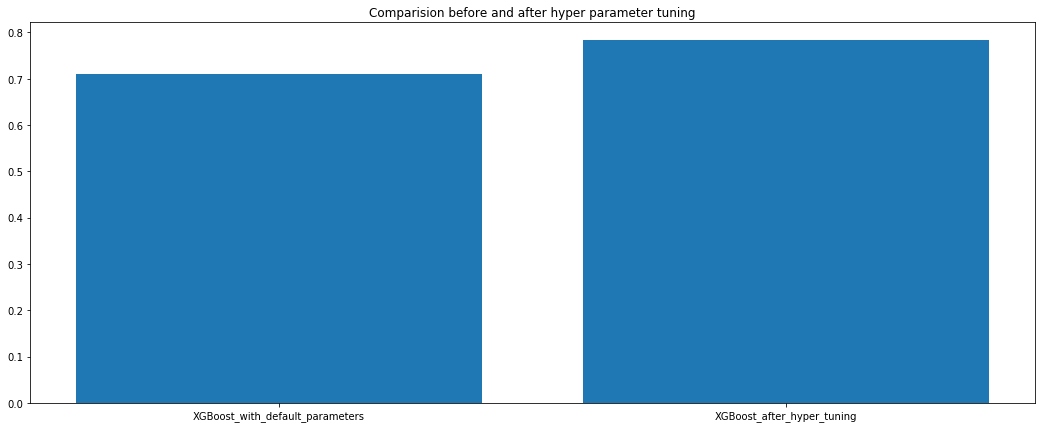

In [101]:
normVShyper = [accuracy_xgb,accuracy_xgb_tuned]
performance_xgb = dict(XGBoost_with_default_parameters = accuracy_xgb,XGBoost_after_hyper_tuning = accuracy_xgb_tuned)
plt.figure(figsize=(18,7))
plt.bar(range(len(performance_xgb)), list(performance_xgb.values()), align='center')
plt.xticks(range(len(performance_xgb)), list(performance_xgb.keys()))
plt.title("Comparision before and after hyper parameter tuning")
#plt.xticks(rotation=50)

Text(0.5, 1.0, 'Comparision between the best models - XGBoost and RandomForest')

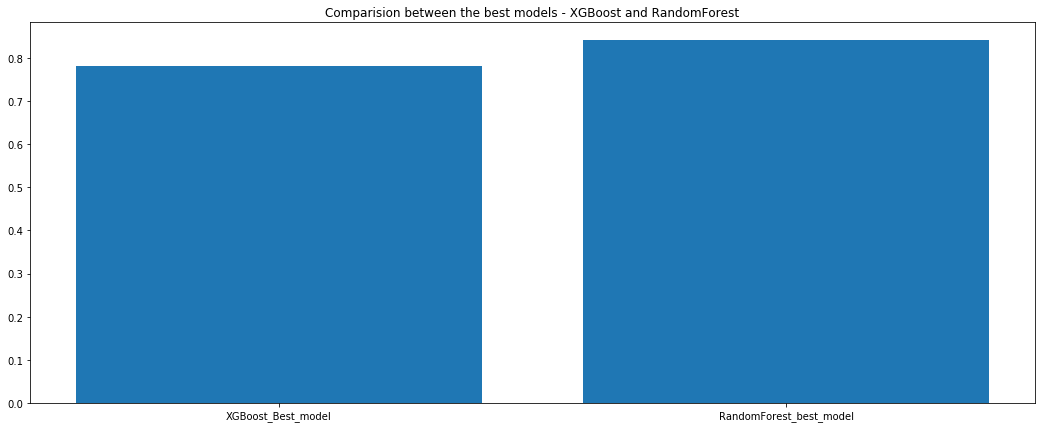

In [103]:
xgb_dt = dict(XGBoost_Best_model = accuracy_xgb_tuned,RandomForest_best_model = accuracy_rf_tuned)
plt.figure(figsize=(18,7))
plt.bar(range(len(xgb_dt)), list(xgb_dt.values()), align='center')
plt.xticks(range(len(xgb_dt)), list(xgb_dt.keys()))
plt.title("Comparision between the best models - XGBoost and RandomForest")

# The best model is Random Forest!

# Testing the model

In [86]:
def credit_risk(model):
    disbursed_amnt = int(input("Amount of loan the user requested: "))
    disbursed_amnt = np.sqrt(disbursed_amnt)
    
    ltv = float(input("Enter the loan to asset value ratio: "))
    ltv = np.cbrt(ltv)
    
    emp_type = int(input("Enter the employement type (0: Self employed , 1: Salaried ): "))
    aadhar = int(input("Has the user submitted aadhar? (Enter 1 if yes and 0 if no): "))
    cibil = int(input("The CIBIL score falls under which category? (0: High risk, 1:Low risk, 2:Medium risk, 3: No Bureau History Available,4: Not scored, 5: Very high risk): "))
    overdue_prim = int(input("How many over due accounts does the primary applicant of this loan have?: "))
    curr_bal_prim = int(input("what is the total Principal outstanding amount of the active loans?: "))
    sanct_prim = int(input("What is the total amount that was sanctioned for all the loans to the primary applicant?: "))
    disbursed_prim = int(input("What is the total amount that was disbursed for all the loans to the primary applicant till now?: "))
    prim_install = int(input("What is the installment amount that the user has chosen?: "))
    new_accnts = int(input("No. of new accounts opened during the past 6 months: "))
    defaulted_accnts = int(input("How many Loans defaulted in the last 6 months? : "))
    inq = int(input("No. of inquiries made by user regarding the loan : "))
    #age = int(input("Enter your age: "))
    amnt_diff = sanct_prim - disbursed_prim
    tenure = int(input("Loan tenure in months : "))
    cred_hist = int(input("Time since first loan in months: "))
    
    args = [disbursed_amnt,ltv,emp_type,aadhar,cibil,overdue_prim,curr_bal_prim,sanct_prim,disbursed_prim,prim_install,new_accnts,defaulted_accnts,inq,amnt_diff,tenure,cred_hist]
    args = np.array(args)
    args = args.reshape(1,-1)
    risk_percent = model.predict_proba(args)[0][1]*100
    verdict = model.predict(args)
    
    if(verdict==0):
        verdict = "Sanction"
    else:
        verdict = "Don't sanction"
    
    
    print("\n")
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("\n")
    print("The risk associated with sanctioning this loan is: "+str(int(risk_percent))+" %")
    print("The final verdict is: "+str(verdict))
    print("\n")
    print("Prediction accuracy is 84 %")
    print("Taken threshold value to give final verdict is 50 %. Can be changed as per requirement")

In [88]:
credit_risk(rf_finetuned)

Amount of loan the user requested:  57259
Enter the loan to asset value ratio:  85
Enter the employement type (0: Self employed , 1: Salaried ):  0
Has the user submitted aadhar? (Enter 1 if yes and 0 if no):  1
The CIBIL score falls under which category? (0: High risk, 1:Low risk, 2:Medium risk, 3: No Bureau History Available,4: Not scored, 5: Very high risk):  5
How many over due accounts does the primary applicant of this loan have?:  2
what is the total Principal outstanding amount of the active loans?:  163805
What is the total amount that was sanctioned for all the loans to the primary applicant?:  393212
What is the total amount that was disbursed for all the loans to the primary applicant till now?:  393212
What is the installment amount that the user has chosen?:  7350
No. of new accounts opened during the past 6 months:  3
How many Loans defaulted in the last 6 months? :  0
No. of inquiries made by user regarding the loan :  0
Loan tenure in months :  34
Time since first loan



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


The risk associated with sanctioning this loan is: 12 %
The final verdict is: Sanction


Prediction accuracy is 84 %
Taken threshold value to give final verdict is 50 %. Can be changed as per requirement
